In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn,rand
import  matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()#查看是否有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
#统计吸烟的人数
count=0
for i in data.smoker:
    if i=='yes':
        count+=1
print(count)


274


In [8]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [46]:
data.charges[data.sex=='male']

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
8        6406.41070
           ...     
1324     4239.89265
1325    13143.33665
1327     9377.90470
1329    10325.20600
1333    10600.54830
Name: charges, Length: 676, dtype: float64

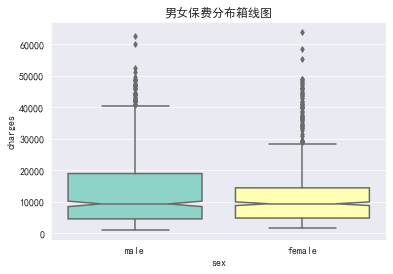

In [6]:
#男女保费
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid', {'font.sans-serif':['SimHei', 'Arial']})#设置图表背景颜色字体
sns.boxplot(y='charges',data=data,x='sex',order=['male','female'],palette='Set3',saturation=1.5,fliersize=4,notch=True)
plt.title('男女保费分布箱线图')
plt.savefig('gender.png',dpi=400)

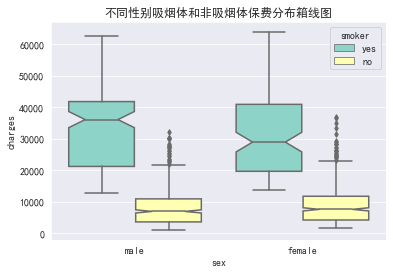

In [20]:
#男女保费
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid', {'font.sans-serif':['SimHei', 'Arial']})#设置图表背景颜色字体
sns.boxplot(y='charges',data=data,x='sex',hue='smoker',order=['male','female'],palette='Set3',saturation=1.5,fliersize=4,notch=True)
plt.title('不同性别吸烟体和非吸烟体保费分布箱线图')
plt.savefig('gender_smoker.png',dpi=400)

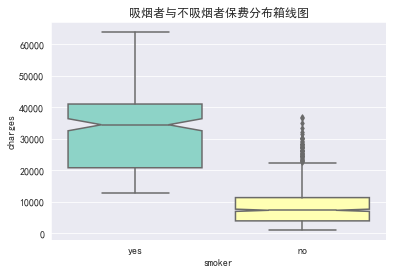

In [10]:
#吸烟者与不吸烟者保费
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid', {'font.sans-serif':['SimHei', 'Arial']})#设置图表背景颜色字体
sns.boxplot(y='charges',data=data,x='smoker',order=['yes','no'],palette='Set3',saturation=1.5,fliersize=4,notch=True)
plt.title('吸烟者与不吸烟者保费分布箱线图')
plt.savefig('smoker.png',dpi=400)

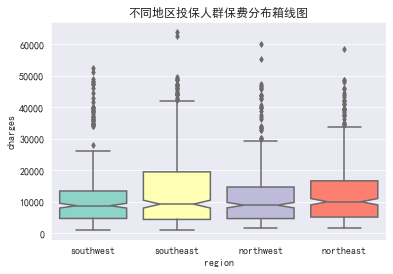

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid', {'font.sans-serif':['SimHei', 'Arial']})#设置图表背景颜色字体
sns.boxplot(y='charges',data=data,x='region',palette='Set3',saturation=1.5,fliersize=4,notch=True)
plt.title('不同地区投保人群保费分布箱线图')
plt.savefig('region.png',dpi=400)

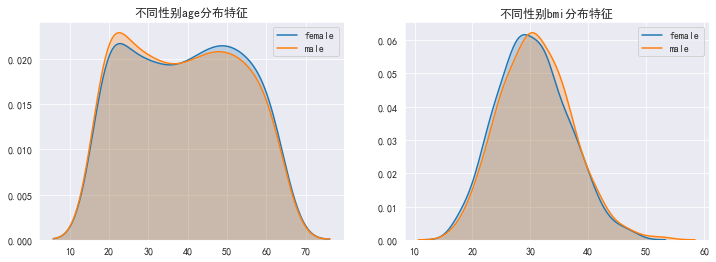

In [23]:
cols = ['age','bmi']
sex = ['female','male']
fig,ax = plt.subplots(1,2,figsize=(12,4))
for col,p in zip(cols,range(2)):
    for s in sex:
        sns.kdeplot(data[col][data['sex']==s],label=s,ax=ax[p],shade=True)
        ax[p].set_title('不同性别%s分布特征'%col)
        ax[p].legend()
plt.savefig('age_bmi_kde_sex.png',dpi=400)

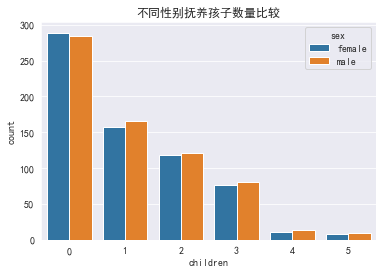

In [16]:
sns.countplot(data=data,x='children',hue='sex')
plt.title('不同性别抚养孩子数量比较')
plt.savefig('childern_age.png',dpi=400)

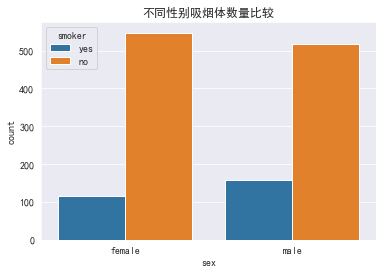

In [18]:
sns.countplot(data=data,x='sex',hue='smoker')
plt.title('不同性别吸烟体数量比较')
plt.savefig('smoker_sex.png',dpi=400)

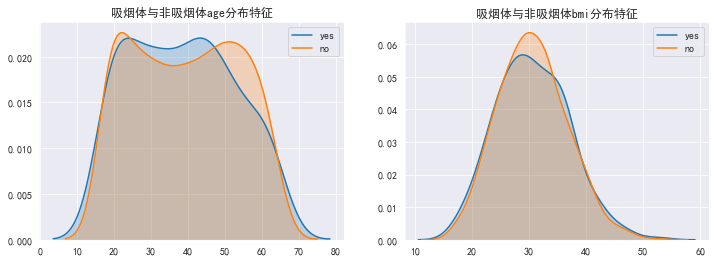

In [24]:
cols = ['age','bmi']
sex = ['yes','no']
fig,ax = plt.subplots(1,2,figsize=(12,4))
for col,p in zip(cols,range(2)):
    for s in sex:
        sns.kdeplot(data[col][data['smoker']==s],label=s,ax=ax[p],shade=True)
        ax[p].set_title('吸烟体与非吸烟体%s分布特征'%col)
        ax[p].legend()
plt.savefig('age_bmi_kde_smoker.png',dpi=400)

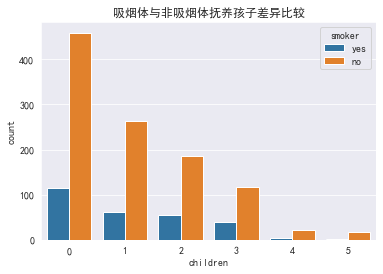

In [25]:
sns.countplot(data=data,x='children',hue='smoker')
plt.title('吸烟体与非吸烟体抚养孩子差异比较')
plt.savefig('childern_smoker.png',dpi=400)

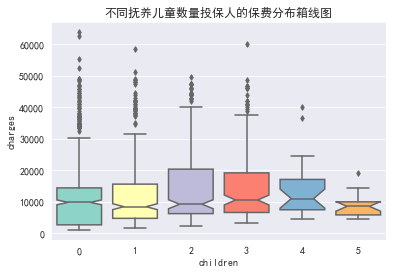

In [29]:
sns.boxplot(y='charges',data=data,x='children',palette='Set3',saturation=1.5,fliersize=4,notch=True)
plt.title('不同抚养儿童数量投保人的保费分布箱线图')
plt.savefig('childern.png',dpi=400)

In [30]:
data.groupby('children')['charges'].mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

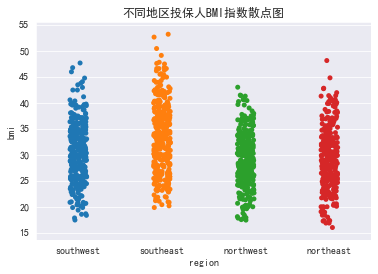

In [32]:
sns.stripplot(data=data,x='region',y='bmi')
plt.title('不同地区投保人BMI指数散点图')
plt.savefig('bmi_reg_scat.png',dpi=400)

In [46]:
data_tem=data.groupby('region')['children'].mean()
data_tem=data_tem.sort_values()

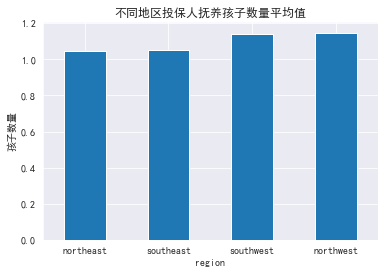

In [48]:
data_tem.plot(kind='bar',rot=360)
plt.title('不同地区投保人抚养孩子数量平均值')
plt.ylabel('孩子数量')
plt.savefig('child_region_avg.png',dpi=400)

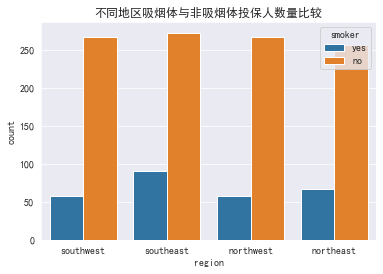

In [49]:
sns.countplot(x=data['region'],hue=data['smoker'])
plt.title('不同地区吸烟体与非吸烟体投保人数量比较')
plt.savefig('region_smoker.png',dpi=400)

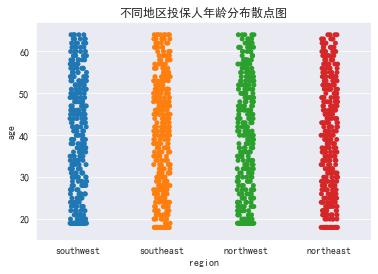

In [50]:
sns.stripplot(data=data,x='region',y='age')
plt.title('不同地区投保人年龄分布散点图')
plt.savefig('age_reg_scat.png',dpi=400)

In [54]:
reg_age=data.groupby('region')['age'].mean()
reg_age=reg_age.sort_values()

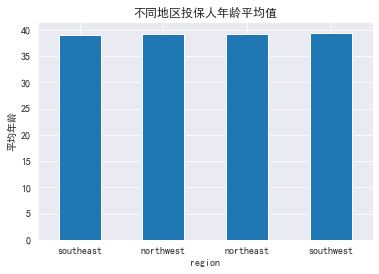

In [55]:
reg_age.plot(kind='bar',rot=360)
plt.title('不同地区投保人年龄平均值')
plt.ylabel('平均年龄')
plt.savefig('reg_avg_age.png',dpi=400)

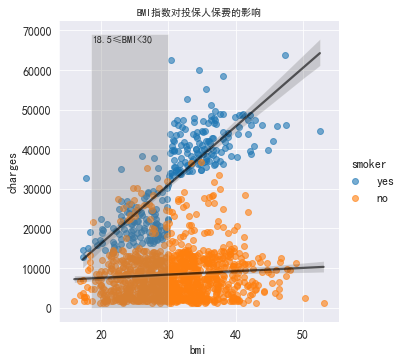

In [71]:
plt.rcParams["font.size"]=12
sns.lmplot(data=data,x='bmi',y='charges',hue='smoker',line_kws=dict(color='black',alpha=0.6),scatter_kws=dict(alpha=0.6))
plt.fill_betweenx(x1=18.5,x2=30,y=(-100,69000),facecolor='gray',alpha=0.3,edgecolor='w')
plt.text(x=18.6,y=67000,s='18.5≤BMI<30',fontsize=10)
plt.title('BMI指数对投保人保费的影响',fontsize=10)
plt.savefig('bmi_charges.png',dpi=400)

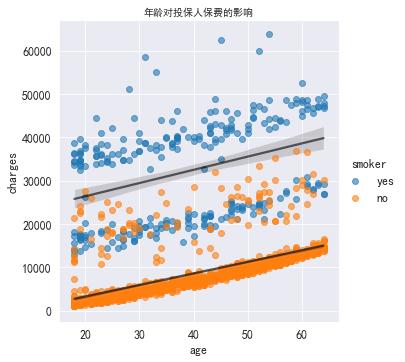

In [73]:
plt.rcParams["font.size"]=12
sns.lmplot(data=data,x='age',y='charges',hue='smoker',line_kws=dict(color='black',alpha=0.6),scatter_kws=dict(alpha=0.6))
plt.title('年龄对投保人保费的影响',fontsize=10)
plt.savefig('age_charges.png',dpi=400)

In [75]:
#多元线性回归模型预测保费
#哑变量处理
catColumns = ['sex', 'smoker', 'region']
data_dum = pd.get_dummies(data, columns = catColumns, drop_first=True)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [76]:
data_dum[:20]

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


In [79]:
#形成变量和应变量x,y
x = data_dum[['age','bmi', 'smoker_yes']]
y = data_dum['charges']
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
#使用线性回归的形式来做预测
linreg = LinearRegression()
#RidgeCV
ridgereg = RidgeCV(alphas=(0.1,0.3,0.7,1.0),cv=5)
#LassoCV
lassoreg = LassoCV(eps=0.001, cv = 5)


In [80]:
#为x,y创建线性回归方程
from sklearn.model_selection import cross_val_score
linreg.fit(x,y) #membuat model regresi untuk x dan y
linreg.score(x,y) #skor regresi linear atau Nilai R square

0.7474771588119513

In [82]:
#提出系数和借据值
#memunculkan koefisien Beta B1,B2,B3
linreg.coef_



array([  259.54749155,   322.61513282, 23823.68449531])

In [83]:
#memunculkan intercept atau Beta nol-B0
linreg.intercept_

-11676.830425187782

In [92]:
def calc_insurance(age,bmi,smoking):
    y = ((age*linreg.coef_[0])+(bmi*linreg.coef_[1])+(smoking*linreg.coef_[2])-linreg.intercept_)
    return y
    


In [94]:
print(calc_insurance(40, 35, 0))


33350.25973593014


In [95]:
print(calc_insurance(40, 35, 1))


57173.94423123897


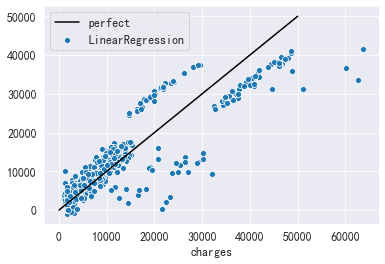

In [101]:
from sklearn.model_selection import train_test_split,cross_val_score
xtrain,xtest,ytrain,ytest = train_test_split(data_dum[['age','bmi','smoker_yes']],data_dum['charges'],test_size=0.3)
y_lpre = linreg .predict(xtest)
sns.scatterplot(ytest,y_lpre,label='LinearRegression')
#sns.scatterplot(ytest,y_dpre,label='DecisionTreeRegression')
sns.lineplot(x=[0,50000],y=[0,50000],label='perfect',color='black')
plt.savefig('regression_fit.png',dpi=400)
plt.legend()


In [102]:
#决策树
from sklearn.tree import DecisionTreeRegressor
dre = DecisionTreeRegressor(criterion='mse',splitter='best',random_state=20,max_depth=4)
dre.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=20, splitter='best')

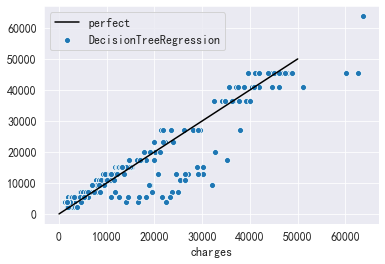

In [105]:
y_dpre = dre.predict(xtest)
sns.scatterplot(ytest,y_dpre,label='DecisionTreeRegression')
sns.lineplot(x=[0,50000],y=[0,50000],label='perfect',color='black')
plt.legend()

plt.savefig('decisiontree_fit.png',dpi=400)